## Support Vector Machines

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import os
import scipy.optimize as opt
from scipy.io import loadmat # used to implement mat file type
import random as rd
import ex6_func as fn

# Update the matplotlib configuration parameters: 
matplotlib.rcParams.update({'font.size': 12, 'font.family': 'ubuntu'})
% matplotlib inline

## 1 Example Dataset 1

## Loading and Visualizing Data

In [2]:
# Loading Data
directory = os.getcwd() + '/ex6data1.mat'
raw_data = loadmat(directory)
print raw_data.keys()

# create dataframe
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
# add y to the dataframe
data['y'] = raw_data['y']
data.head()

['y', 'X', '__version__', '__header__', '__globals__']


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


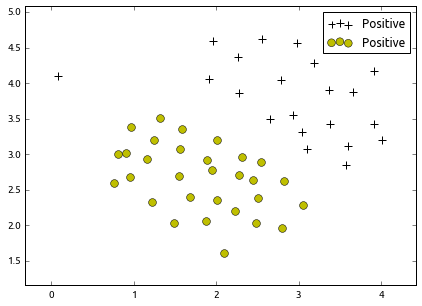

In [3]:
reload(fn)

# assing the values as nupmy arrays
X = np.array(raw_data['X'])
y = np.ravel(np.array(raw_data['y']))
fn.plotData(X,y)

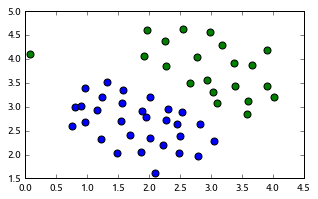

In [4]:
# an alterntive way to plot data by using pandas groupby object
plt.figure(figsize=(5,3))
for key, grp in data.groupby('y'):
        plt.plot(grp['X1'],grp['X2'],'o',mew=1, ms=7)
        
# or a very fast way to plot data
# plt.scatter(data['X1'],data['X2'],c=data['y'],cmap=plt.cm.coolwarm,s=40)

## Training Linear SVM

#### C = 1

In [5]:
from sklearn import svm

Cval = 1
svc = svm.LinearSVC(C = Cval,
                    loss='hinge',
                    max_iter=1000)

svc.fit(X,y)

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

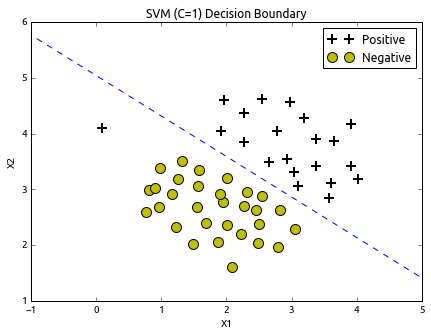

In [6]:
reload(fn)

fn.visualizeBoundaryLinear(X,y,Cval,svc)

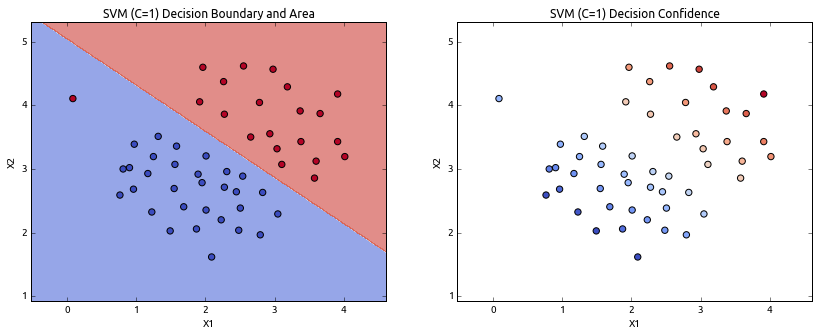

In [7]:
reload(fn)

fn.SVM_classifiers(X,y,Cval,svc)

#### C = 100

In [8]:
Cval = 100
svc = svm.LinearSVC(C = Cval,
                    loss='hinge',
                    max_iter=1000)

svc.fit(X,y)

LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0)

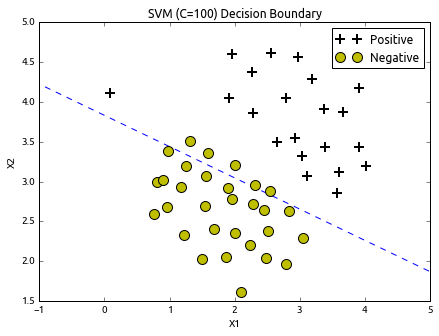

In [9]:
reload(fn)

fn.visualizeBoundaryLinear(X,y,Cval,svc)

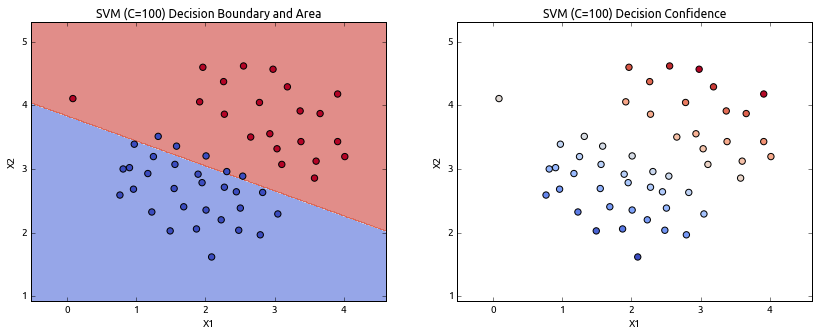

In [10]:
reload(fn)

fn.SVM_classifiers(X,y,Cval,svc)

## 2 SVM with Gaussian Kernels

In this part of the exercise, SVMs is employed to do non-linear clas-sification.  In particular, SVMs with Gaussian kernels is used on datasets that are not linearly separable.

## Gaussian Kernel

In [11]:
reload(fn)
#initialize some values
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = fn.gaussianKernel(x1, x2, sigma)

print 'Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :{}'.format(sim) 
print '\n(this value should be about 0.324652)\n'

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :0.324652467358

(this value should be about 0.324652)



## Example Dataset 2

## Loading and Visualizing Data

In [12]:
# Loading Data
directory = os.getcwd() + '/ex6data2.mat'
raw_data = loadmat(directory)
print raw_data.keys()
# create dataframe
data = pd.DataFrame(raw_data['X'], columns=['X1', 'X2'])
# add y to the dataframe
data['y'] = raw_data['y']
data.head()

['y', 'X', '__version__', '__header__', '__globals__']


,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


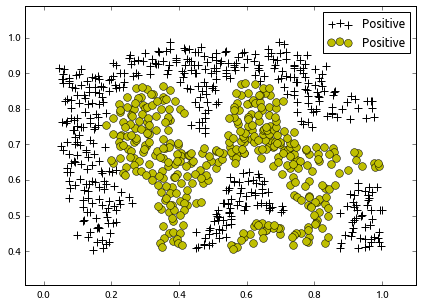

In [13]:
reload(fn)

# assing the values as nupmy arrays
X = np.array(raw_data['X'])
y = np.ravel(np.array(raw_data['y']))
fn.plotData(X,y)

## Train the SVM with the Gaussian kernel

In [14]:
Cval = 100
sigma = 0.1
gammaval = np.power(sigma,-2.)
svc = svm.SVC(C=Cval, gamma=gammaval)
svc

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=99.999999999999986,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
X = data[['X1', 'X2']].values
y = data['y'].values

svc.fit(X,y)
svc.score(X,y)

0.99884125144843572

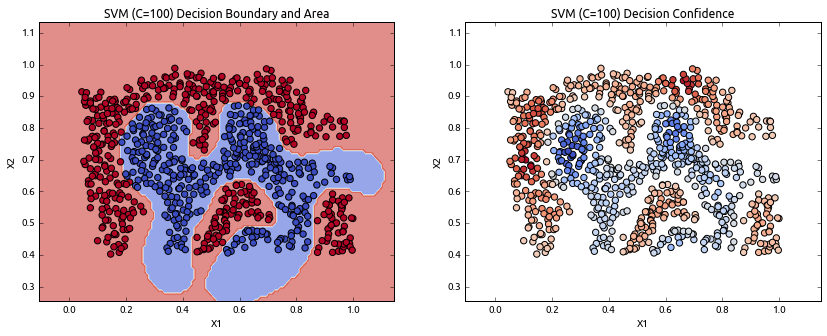

In [16]:
reload(fn)

fn.SVM_classifiers(X,y,Cval,svc)

## Example Dataset 3

In [17]:
# Loading Data
directory = os.getcwd() + '/ex6data3.mat'
raw_data = loadmat(directory)
print raw_data.keys()

# create arrays
X = np.array(raw_data['X'])
X_val = np.array(raw_data['Xval'])

y = np.array(raw_data['y']).ravel()
y_val = np.array(raw_data['yval']).ravel()

print X.shape,y.shape,X_val.shape,y_val.shape

['yval', '__header__', '__globals__', 'Xval', 'y', 'X', '__version__']
(211, 2) (211,) (200, 2) (200,)


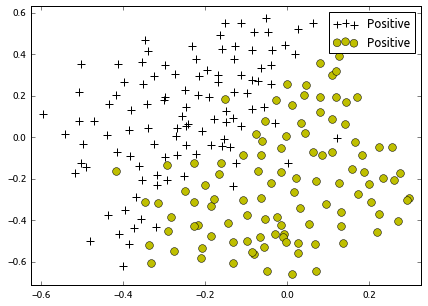

In [18]:
reload(fn)

fn.plotData(X,y)

In [19]:
C_vals = np.array([0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.])
sigma_vals = np.array([0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30.])
score_space = np.zeros((C_vals.size,sigma_vals.size))

for ci in range(C_vals.size):
    for si in range(sigma_vals.size):
        Cval,sigma = C_vals[ci],sigma_vals[si] 
        gammaval = np.power(sigma,-2.)
        svc = svm.SVC(C=Cval, gamma=gammaval)
        svc.fit(X, y)
        score_space[ci,si] = svc.score(X_val, y_val)

score_space

array([[ 0.435,  0.435,  0.435,  0.435,  0.435,  0.435,  0.435,  0.435],
       [ 0.435,  0.435,  0.435,  0.9  ,  0.795,  0.435,  0.435,  0.435],
       [ 0.435,  0.435,  0.86 ,  0.93 ,  0.845,  0.535,  0.435,  0.435],
       [ 0.435,  0.465,  0.965,  0.95 ,  0.91 ,  0.825,  0.435,  0.435],
       [ 0.54 ,  0.885,  0.965,  0.95 ,  0.94 ,  0.87 ,  0.5  ,  0.435],
       [ 0.555,  0.88 ,  0.945,  0.955,  0.925,  0.915,  0.82 ,  0.435],
       [ 0.555,  0.88 ,  0.945,  0.96 ,  0.925,  0.93 ,  0.865,  0.59 ],
       [ 0.555,  0.88 ,  0.92 ,  0.96 ,  0.935,  0.935,  0.915,  0.82 ]])

In [20]:
# assing variables the best values
i,j = np.unravel_index(score_space.argmax(), score_space.shape)
b_Cval = C_vals[i]
b_sigma = sigma_vals[j]
gammaval = np.power(b_sigma,-2.)
# fit the model
svc = svm.SVC(C=b_Cval, gamma=gammaval)
svc.fit(X, y)

SVC(C=0.29999999999999999, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=99.999999999999986,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

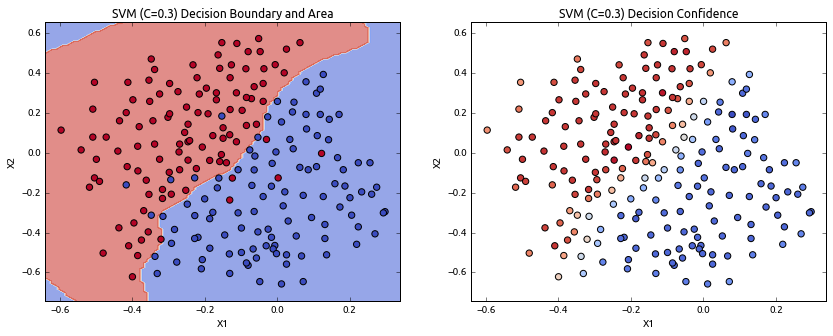

In [21]:
reload(fn)

fn.SVM_classifiers(X,y,b_Cval,svc)